In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
from PIL import Image, ImageStat

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

# Assignment 2b - Fun with food (PyTorch)

In this assignment, we will be going over a toy example and have you implement small chunks of code and debug some code. There will also be open-ended questions in the assignment.

Before we get started, 
- 1: Change the runtime type to `GPU`
- 2: Run the data import cells (~ 2 mins)
- 3: Import the proper libraries

In [12]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xf  food-101.tar.gz
!tar -xzf food-101.tar.gz --wildcards --no-anchored 'sashimi'
!tar -xzf food-101.tar.gz --wildcards --no-anchored 'french_fries'
!rm food-101.tar.gz

--2020-12-11 00:20:14--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2020-12-11 00:20:14--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  47.7MB/s    in 2m 32s  

2020-12-11 00:22:46 (31.3 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



Make sure that the `food-101` directory is present within your root directory on the left. If not, run the cell above again. This step should not take longer than 5 minutes. If not, you can try to download it manually through visiting http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz.

## 0 - Preparing the data

You don't have to write any code, but you should understand it.

In [ ]:
images = []
labels = []
means = []
stds = []
for food in ['sashimi', 'french_fries']:
  root = "food-101/images/"
  for path in os.listdir(f"{root}{food}"):
    im = Image.open(f"{root}{food}/{path}")
    means.append(np.array(ImageStat.Stat(im, mask=None).mean))
    stds.append(np.sqrt(ImageStat.Stat(im, mask=None).var))
    images.append(im)
    labels.append(food)
mean = np.mean(means, axis=0)
std = np.std(stds, axis=0)

## 1 - Dataset

You and your friend Amanda are hanging and start a debate. Amanda mentions how much more 'sashimi' is insta-worthy than french fries. You disagree with her. Thereefore, you want to create a classifier that classifies whether an image is a photo of french fries or sashimi. Answer the following questions and complete the code down below.

**Question 1.1** Analyze our available toy dataset `images` and `labels`.
- How many images do we have? How many of those are labeled sashimi and french fries?
- What are the image dimensions?
- Visualize one example of a photo with french fries and one with sashimi.

In [ ]:
# BEGIN 1.1

**Question 1.2** 
Mention 2 of the data augmentation methods that you think might be useful for the purpose of this dataset. Explain why.

*Write your solution here*

**Question 1.3** We are writing the dataset class. Fill in the blanks below. Make sure that fry is 1 and sashimi is 0 in terms of labels.

In [ ]:
class FryOrNot(Dataset):
    """French Fries vs Sushi Dataset."""

    def __init__(self, images, labels, transform=None):
        """
        Args:
            images (list of images) : list of images
            labels (list of labels) : list of labels
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        #BEGIN CODE
        ...
        #END CODE


    def __getitem__(self, idx):
        #BEGIN CODE
        ...
        #END CODE

        return sample
fries = FryOrNot(images, labels)

## 2 - Data Augmentation

Now we want to perform data augmentation. We will be performing the following data augmentations:

- 1 : Random Translations and Rotations

- 2: Resize the images to 224 x 224

- 2 : Standardize all pictures

**Question 2.1** Go through the **[PyTorch Documentation](https://pytorch.org/docs/stable/index.html)** and use a predefined function to create random translations (both x and y) from [-10,10] and rotations from [-5,5]. Assign this new function to `augmentationA`.

In [ ]:
# BEGIN 2.1
augmentationA = ...

**Question 2.2** Go through the documentation again and use a predefined function to resize a given image to be 224 x 224. Assign this new function that takes in one image to augmentationB.

In [ ]:
# BEGIN 2.2
augmentationB = ...

**Question 2.3** If you remember from class, CNNs work better if images are normalized. Let's do that. Complete the code below.

In [ ]:
def standard(image):
  """
  Divides an image by 255 and then subtracts 0.5 from it.
  """
  # BEGIN CODE
  ...
  # END CODE

  return standard

augmentationC = standard

**Question 2.4** Assign the `food_dataset` such that they transform the images in the following order:

- 1: augmentationA
- 2: augmentationB
- 3: augmentationC
- 4: Convert the images to tensors

*HINT* Look up on the documentation on how to combine transforms.

*HINT 2* Converting the images to tensors is already defined in the PyTorch library. Look it up in the documentation.

In [ ]:
food_dataset = ...

## 3 - Data Loader

**Question 3**
Divide the dataset `fries` up in a train and test loader in an 80/20 split.

*Hint* You might want to use `torch.utils.data.Subset`

In [ ]:
#BEGIN CODE
train_indices = ...
test_indices = ...


train_loader = DataLoader(..., batch_size=8, num_workers=4)
test_loader = DataLoader(..., batch_size=8, num_workers=4)
#END CODE

## 4 - CNN

**Question 4** We are writing a 5 layer Convolutional Neural Network. It's broken. Help to make it work again.

In [ ]:
#START FIXME
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 25, 3)
        self.conv4 = nn.Conv2d(25, 32, 3)
        self.conv5 = nn.Conv2d(32, 35, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        # START CODE
        return
        # END CODE


mynet = Net()
#END FIXME

## 5 - ResNets

**Question 5** Download a pre-trained `ResNet18` and assign it to `resNet`. Modify the output layers such that it fits our objective.

In [ ]:
#BEGIN CODE
import torchvision.models as models
resNet = ...
...
#END CODE

Ellipsis

## 6 - Training Models and Searches

**Question 6a** Let's train `myNet`. Fix the code below such that it works. You also might want to fix the code from your `mynet`.

In [ ]:
lr = [0.1, 0.01, 0.001]
epochs = 5 # For now, we will stick with 5 epochs for our toy models
for alpha in lr:  
    import torch.optim as optim

    criterion = nn.BCELoss()
    optimizer = optim.SGD(mynet().parameters(), lr=alpha, momentum=0.9)

    for epoch in range(epochs):  # loop over the dataset multiple times
        train_loss = 0.0
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, data = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = mynet(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss
            train_loss += loss
            if i % 10 == 9:    # print every 10 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 10))
                running_loss = 0.0
            
        # evaluate on test set
        with torch.no_grad():
          val_loss = 0.0
          for data in test_loader:
            inputs = data['image']
            labels = data['label']
            outputs = mynet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
          print(f"{10*'='}Epoch {epoch} - Train Loss {train_loss/len(train_loader)} - Val Loss {val_loss/len(test_loader)} {10*'='}")

print('Finished Training')

**Question 6a II)** The Neural Network is not performing well. Start thinking about why this is the case?

// WRITE YOUR SOLUTION HERE

**Question 6b** Let's train `resNet`. Copy and edit the code from above such that it works for the resnet. Also make sure that we use `CUDA` to use our GPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
...

Ellipsis

## 7 - Adversarial Perturbations

For this part, you don't have to answer any questions. Let's observe the two pictures of sashimi. Do you see any differences between the two? You shouldn't! Yet we have added some white noise ($N~ (\mu=0, \sigma=0.10))$. However, we will see that Neural Networks are exceedingly sensitive to this. We will not go deeper into why this is the case. But, you should start thinking about this phenomenon and be wary of this.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


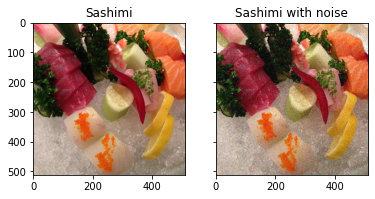

In [ ]:
original = np.array(images[0]).astype(float)/255.
noise = np.array(images[0]).astype(float)/255. + np.random.normal(0, 0.10, (512, 512, 3))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.title.set_text("Sashimi")
ax2.title.set_text("Sashimi with noise")
ax1.imshow(np.array(images[0]))
ax2.imshow(np.array(images[0]).astype(float)/255. + np.random.normal(0, 0.10, (512, 512, 3)));

In [ ]:
# Show example
with torch.no_grad(): 
  print(f"Probability of French Fry: {resNet(transforms.toTensor()(original))}")
  print(f"Probability of French Fry for noisy picture: {resNet(transforms.toTensor()noise))}")